# EP5 - MAC0460 - Machine Learning
Nesta primeira parte do código, peguei o dataset MNIST e, após sua leitura, selecionei todos os dados pertencentes às classes de interesse, tomando cuidado com as especificações informadas no enunciado do EP sobre _shape_ dos arrays e tamanho, por exemplo. Após selecioná-los, normalizei dividindo-os por 255 (valor máximo)

In [175]:
from keras.datasets import mnist
import numpy as np
from random import randint

(x_train, y_train), (x_test, y_test) = mnist.load_data()

X_train = np.empty((2500, 784))
Y_train = np.empty((2500, ))

max = 255

interest_i = []

interest = np.empty((0, 784))

for i in range(5):
    interest_i.append(interest)

for i in range(60000):
    if y_train[i] < 5:
        x_t = x_train[i].flatten()
        interest_i[y_train[i]] = np.append(interest_i[y_train[i]], [x_t], axis = 0)
        size = interest_i[y_train[i]].shape[0]-1
        for j in range(784):
            interest_i[y_train[i]][size][j] = interest_i[y_train[i]][size][j]/max

print(interest_i[0].shape)
print(interest_i[1].shape)
print(interest_i[2].shape)
print(interest_i[3].shape)
print(interest_i[4].shape)

(5923, 784)
(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)


Com o _dataset_ dividido nas classes de interesse, selecionei aleatoriamente 500 dados de cada classe e coloquei no vetor _X_train_, junto com sua classificação em _Y_train_. Além disso, randomizei _X_train_ inteiro, tomando o cuidado de randomizar _Y_train_ de mesma forma para que a classificação de cada dado (_Y_train_) fosse acompanhada corretamente com o dado (_X_train_)

In [177]:
def random_arr (start, index):
    for i in range(start, start+500):
        rand = randint(0, interest_i[index].shape[0]-1)
        X_train[i] = interest_i[index][rand]
        Y_train[i] = index
        interest_i[index] = np.delete(interest_i[index], (rand), axis=0)

for i in range(5):
    random_arr(i*500, i)
        
rand = np.random.get_state()
np.random.shuffle(X_train)
np.random.set_state(rand)
np.random.shuffle(Y_train)
print("Terminou") 

Terminou


Aqui, selecionei todos os dados _x_test_ que respeitavam alguma das classes de interesse (_y_test_), e os coloquei em _X_test_, carregando cada uma das classes em _Y_test_. Além disso, normalizei dividindo por 255 também.

In [178]:
X_test = np.empty((0, 784))
Y_test = np.empty((0, ))

interest = np.empty((784, ))

for i in range(10000):
    if y_test[i] < 5:
        for j in range(784):
            interest[j] = x_test[i].flatten()[j]/max
        X_test = np.append(X_test, [interest], axis = 0)
        Y_test = np.append(Y_test, [y_test[i]], axis = 0)
        
print(X_test.shape)        
print(Y_test.shape)

(5139, 784)
(5139,)


In [179]:
print("Shape de X_train e Y_train, respectivamente")
print(X_train.shape)
print(Y_train.shape)

print("")

print("Shape de X_test e Y_test, respectivamente")
print(X_test.shape)
print(Y_test.shape)

print("")

print("X_train")
print("mínimo: ", np.amin(X_train))
print("máximo: ", np.amax(X_train))

print("")

print("Y_train")
print("mínimo: ", np.amin(Y_train))
print("máximo: ", np.amax(Y_train))

print("")

print("X_test")
print("mínimo: ", np.amin(X_test))
print("máximo: ", np.amax(X_test))

print("")

print("Y_test")
print("mínimo: ", np.amin(Y_test))
print("máximo: ", np.amax(Y_test))

Shape de X_train e Y_train, respectivamente
(2500, 784)
(2500,)

Shape de X_test e Y_test, respectivamente
(5139, 784)
(5139,)

X_train
mínimo:  0.0
máximo:  1.0

Y_train
mínimo:  0.0
máximo:  4.0

X_test
mínimo:  0.0
máximo:  1.0

Y_test
mínimo:  0.0
máximo:  4.0


No módulo abaixo, dividi o _X_train_ e _Y_train_ em duas partes, cinco vezes(baseado no _five-fold cross-validation_): uma das partes será o "novo _dataset_" para treino (4/5 do _X_train_) e a outra parte será o "novo _dataset_" para teste (o 1/5 restante do _X_train_). Tomei cuidado para que o 1/5 do novo teste fosse sempre somente de uma classe e, como fiz esse processo cinco vezes, todas as classes são selecionadas. Os 4/5 sempre serão o complemento dos 1/5 selecionado primeiramente.

In [180]:
X_test_i = np.array_split(X_train, 5)
Y_test_i = np.array_split(Y_train, 5)

x_training = np.empty((5, 2000, 784))
y_training = np.empty((5, 2000))

for i in range(5):
    X_train_i = np.empty((0, 784))
    Y_train_i = np.empty((0))
    for j in range(0, i):
        X_train_i = np.concatenate((X_train_i, X_test_i[j]))
        Y_train_i = np.concatenate((Y_train_i, Y_test_i[j]))
    for k in range(i+1, 5):
        X_train_i = np.concatenate((X_train_i, X_test_i[k]))
        Y_train_i = np.concatenate((Y_train_i, Y_test_i[k]))
    x_training[i] = X_train_i
    y_training[i] = Y_train_i

Abaixo está o treinamento utilizando o classificador SVM com kernel RBF, implementado no _scikit-learn_. Selecionando o _X_train_ e _X_test_ que foram previamente divididos no módulo anterior corretamente, a implementeção do _five-fold cross-validation_ ficou bem fácil. É selecionado cada parcela da iteração e é contabilizado a quantidade de dados de cada classe e a precisão da iteração (além da média das precisões, ou seja, a precisão final do _cross-validation_)

In [181]:
#SVM - RBF Kernel
from sklearn import svm

print("* * * * *")

errorsRBF = 0
    
rbf_svm = svm.SVC(kernel='rbf', gamma=0.05, C=5)

for i in range(5):
    rbf_svm.fit(x_training[i], y_training[i])
    Y_tested = rbf_svm.predict(X_test_i[i])
    
    errorsITE = 0
    count0 = 0
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    
    for l in range(500):
        
        
        if (Y_test_i[i][l] == 0):
            count0 = count0 + 1
        if (Y_test_i[i][l] == 1):
            count1 = count1 + 1
        if (Y_test_i[i][l] == 2):
            count2 = count2 + 1
        if (Y_test_i[i][l] == 3):
            count3 = count3 + 1
        if (Y_test_i[i][l] == 4):
            count4 = count4 + 1

            
        if (Y_tested[l] != Y_test_i[i][l]):
            errorsITE = errorsITE + 1
            errorsRBF = errorsRBF + 1
    print("Iteração ", i)
    print("Classes -> 0: ", count0,"; 1: ", count1,"; 2: ", count2,"; 3: ", count3,"; 4: ", count4, sep='')
    print("Acurácia: ", (500-errorsITE)/5,"%", sep='')
    print("* * * * *")
print("Cross-validation accuracy - SVM RBF: ",(2500-errorsRBF)/25,"%", sep='')
    

* * * * *
Iteração  0
Classes -> 0: 93; 1: 95; 2: 106; 3: 101; 4: 105
Acurácia: 97.6%
* * * * *
Iteração  1
Classes -> 0: 97; 1: 104; 2: 105; 3: 103; 4: 91
Acurácia: 97.4%
* * * * *
Iteração  2
Classes -> 0: 101; 1: 110; 2: 85; 3: 95; 4: 109
Acurácia: 98.0%
* * * * *
Iteração  3
Classes -> 0: 107; 1: 102; 2: 98; 3: 98; 4: 95
Acurácia: 96.8%
* * * * *
Iteração  4
Classes -> 0: 102; 1: 89; 2: 106; 3: 103; 4: 100
Acurácia: 97.2%
* * * * *
Cross-validation accuracy - SVM RBF: 97.4%


Mesma coisa aqui, no entanto o classificador é o de redes neurais do tipo MLP, também implementado pelo _scikit-learn_. Com learning rate = 0.005 e número de nós das duas layers ocultas igual a 15 cada, acredito que obtive uma boa relação entre precisão _x_ tempo de execução.

In [182]:
from sklearn.neural_network import MLPClassifier as mlp

errorsMLP = 0
    
nn_mlp = mlp(learning_rate_init=0.005, hidden_layer_sizes=(15, 15))

for i in range(5):
    nn_mlp.fit(x_training[i], y_training[i])
    Y_tested = nn_mlp.predict(X_test_i[i])
    
    errorsITE = 0
    count0 = 0
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    
    for l in range(500):
        
        
        if (Y_test_i[i][l] == 0):
            count0 = count0 + 1
        if (Y_test_i[i][l] == 1):
            count1 = count1 + 1
        if (Y_test_i[i][l] == 2):
            count2 = count2 + 1
        if (Y_test_i[i][l] == 3):
            count3 = count3 + 1
        if (Y_test_i[i][l] == 4):
            count4 = count4 + 1

            
        if (Y_tested[l] != Y_test_i[i][l]):
            errorsITE = errorsITE + 1
            errorsMLP = errorsMLP + 1
    print("Iteração ", i)
    print("Classes -> 0: ", count0,"; 1: ", count1,"; 2: ", count2,"; 3: ", count3,"; 4: ", count4, sep='')
    print("Acurácia: ", (500-errorsITE)/5,"%", sep='')
    print("* * * * *")
print("Cross-validation accuracy - Neural network MLP: ",(2500-errorsMLP)/25,"%", sep='')

Iteração  0
Classes -> 0: 93; 1: 95; 2: 106; 3: 101; 4: 105
Acurácia: 97.0%
* * * * *
Iteração  1
Classes -> 0: 97; 1: 104; 2: 105; 3: 103; 4: 91
Acurácia: 96.2%
* * * * *
Iteração  2
Classes -> 0: 101; 1: 110; 2: 85; 3: 95; 4: 109
Acurácia: 96.2%
* * * * *
Iteração  3
Classes -> 0: 107; 1: 102; 2: 98; 3: 98; 4: 95
Acurácia: 96.0%
* * * * *
Iteração  4
Classes -> 0: 102; 1: 89; 2: 106; 3: 103; 4: 100
Acurácia: 95.2%
* * * * *
Cross-validation accuracy - Neural network MLP: 96.12%


Baseado nos testes efetuados nos módulos anteriores, escolhi usar o algortimo de SVM para receber o treinamento do _dataset_ completo, calculando a acurácia para o conjunto de teste (_X_test_, _Y_test_) e a quantidade de dados em cada classe.

In [183]:
#SVM - RBF Kernel
from sklearn import svm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

print("* * * * *")

errorsRBF = 0
    
rbf_svm2 = svm.SVC(kernel='rbf', gamma=0.05, C=5)

rbf_svm2.fit(X_train, Y_train)
Y_tested = rbf_svm.predict(X_test)

errorsITE = 0
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0

for l in range(Y_tested.shape[0]):


    if (Y_test[l] == 0):
        count0 = count0 + 1
    if (Y_test[l] == 1):
        count1 = count1 + 1
    if (Y_test[l] == 2):
        count2 = count2 + 1
    if (Y_test[l] == 3):
        count3 = count3 + 1
    if (Y_test[l] == 4):
        count4 = count4 + 1


    if (Y_tested[l] != Y_test[l]):
        errorsITE = errorsITE + 1
        errorsRBF = errorsRBF + 1
        
        
print("Classes -> 0: ", count0,"; 1: ", count1,"; 2: ", count2,"; 3: ", count3,"; 4: ", count4, sep='')
print("Acurácia: ", round((100*(Y_tested.shape[0]-errorsITE))/Y_tested.shape[0], 3),"%", sep='')
print("* * * * *")

* * * * *
Classes -> 0: 980; 1: 1135; 2: 1032; 3: 1010; 4: 982
Acurácia: 98.482%
* * * * *


Para terminar, criei a matriz de confusão para a predição (após treinamento do _dataset_ completo). A implementação foi baseada em https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html, que é a implementação do _scikit-learn_ para a matriz de confusão.

In [184]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusão'
        else:
            title = 'Matriz de confusão'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

#plt.show()

Com os resultados apresentados na matriz de confusão, é possível afirmar que a predição feita pelo algorítmo foi bem sucedida, visto que poucos casos foram classificados erroneamente. Portanto, o algoritmo foi treinado eficientemente e foi um sucesso.

Matriz de confusão sem normalização


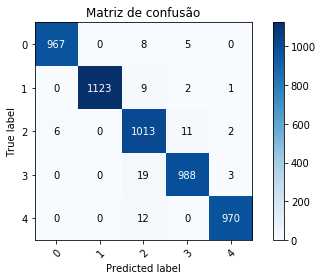

Matriz de confusão normalizada


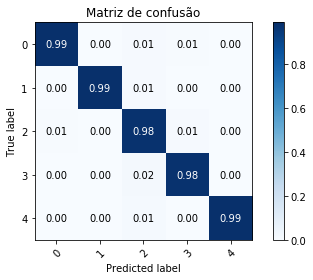

In [185]:
classes = ['0', '1', '2', '3', '4']
plot_confusion_matrix(Y_test, Y_tested, classes) 
plt.show()

plot_confusion_matrix(Y_test, Y_tested, classes, normalize=True) 
plt.show()